<a href="https://colab.research.google.com/github/immohann/Lettuce-Disease/blob/main/disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

In [ ]:
classifier=Sequential()

classifier.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding='valid',input_shape=(224,224,3),activation='relu'))
classifier.add(MaxPool2D((2,2),strides=(2,2),padding='valid'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters=128,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu'))
classifier.add(MaxPool2D((2,2),strides=(2,2),padding='valid'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters=1024,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))

classifier.add(MaxPool2D((2,2),strides=(2,2),padding='valid'))
classifier.add(BatchNormalization())

classifier.add(Flatten())

classifier.add(BatchNormalization())
classifier.add(Dense(1024,activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(512,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(38,activation='softmax'))

classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 23, 23, 128)       307328    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 11, 11, 128)       512       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 512)        

In [ ]:
classifier.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                fill_mode='nearest')

valid_datagen=ImageDataGenerator(rescale=1./255)

batch_size=128
base_dir='../input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)'

training_set=train_datagen.flow_from_directory(base_dir+'/train',
                                              target_size=(224,224),
                                              batch_size=batch_size,
                                              class_mode='categorical')

valid_set=valid_datagen.flow_from_directory(base_dir+'/valid',
                                          target_size=(224,224),
                                          batch_size=batch_size,
                                          class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
print(training_set.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
train_num=training_set.samples
valid_num=valid_set.samples

In [ ]:
reduce_lr=ReduceLROnPlateau(factor=0.5,patience=5)

weights=ModelCheckpoint('weights.hdf5',
                       save_best_only=True,
                       verbose=1,
                       save_weights_only=True)

early_stopping=EarlyStopping(monitor='val_acc',mode='max',patience=5)

history=classifier.fit_generator(training_set,
                                steps_per_epoch=256,
                                validation_data=valid_set,
                                epochs=15,
                                validation_steps=128,
                                callbacks=[reduce_lr,weights,early_stopping])

Epoch 1/15
256/256 [==============================] - 472s 2s/step - loss: 2.7100 - accuracy: 0.2784 - val_loss: 5.9358 - val_accuracy: 0.1665

Epoch 00001: val_loss improved from inf to 5.93575, saving model to weights.hdf5
Epoch 2/15
256/256 [==============================] - 471s 2s/step - loss: 1.4056 - accuracy: 0.5710 - val_loss: 8.1736 - val_accuracy: 0.0833

Epoch 00002: val_loss did not improve from 5.93575
Epoch 3/15
256/256 [==============================] - 468s 2s/step - loss: 0.9939 - accuracy: 0.6889 - val_loss: 2.3738 - val_accuracy: 0.4805

Epoch 00003: val_loss improved from 5.93575 to 2.37382, saving model to weights.hdf5
Epoch 4/15
256/256 [==============================] - 468s 2s/step - loss: 0.7241 - accuracy: 0.7702 - val_loss: 2.7340 - val_accuracy: 0.4164

Epoch 00004: val_loss did not improve from 2.37382
Epoch 5/15
256/256 [==============================] - 458s 2s/step - loss: 0.6121 - accuracy: 0.8043 - val_loss: 3.7503 - val_accuracy: 0.3348

Epoch 00005:

In [ ]:
classifier.save('model1.h5')

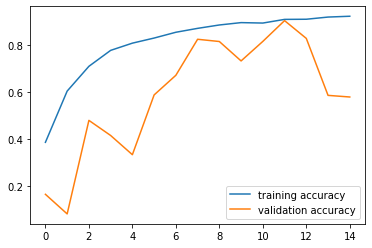

In [ ]:
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')

plt.legend()

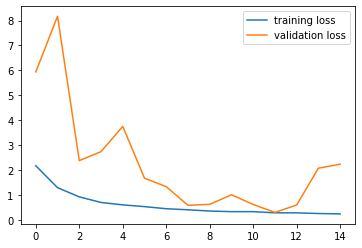

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()

In [2]:
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('/content/drive/MyDrive/Disease-Detection/final-model.h5')
# summarize model.
model.summary()
# load dataset


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 23, 23, 128)       307328    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 11, 11, 128)       512       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 512)        

In [1]:
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
cls={'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato___Leaf_Mold': 31, 'Tomato___Septoria_leaf_spot': 32, 'Tomato___Spider_mites Two-spotted_spider_mite': 33, 'Tomato___Target_Spot': 34, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35, 'Tomato___Tomato_mosaic_virus': 36, 'Tomato___healthy': 37}

In [23]:
clss=[]
for k,v in cls.items():
  clss.append(k)
clss

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

Saving 1572873.jpg to 1572873 (2).jpg


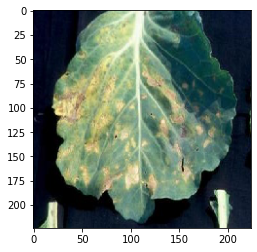

othre


In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt


uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

 
  plt.imshow(img)

  plt.show()

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  for i in classes:
    if classes[0][0]==1:
      print('Downy Mildew Disease Detected')
    if classes[0][1]==1:
      print('Powdery Mildew Disease Detected')
    if classes[0][2]==1:
      print('Septoria Disease Detected')
    else:
      print("othre")

Following is our prediction:


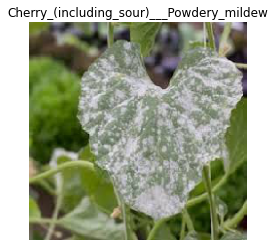

In [33]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "image27.jpeg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = clss[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()